<h1><strong>Wikipedia Summarizer</strong></h1>
<p>Samantha Fields-Samotowka</p>
<p>CISB-63</p>
<p>CRN 21061</p>
<p>October 29, 2023</p>

<h2>Explanation of Project</h2>
<p>I will be creating a basic summarizer for Wikipedia pages</p>

<h2>Techniques Employed</h2>
<ul>
    <li>Web scraping</li>
    <li>Regular expressions</li>
    <li>Tokenizing words</li>
    <li>Removing stop words</li>
    <li>Stemming</li>
    <li>TF-IDF Vectorization</li>
</ul>

<h3>Pages tested</h3>
<p>Found using the "random article" feature on Wikipedia, with the exception of the sixth, which holds personal meaning to me.</p>
<ul>
    <li><a href="https://en.wikipedia.org/wiki/Smooth_toadfish">Smooth Toadfish</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Nomen_dubium">Nomen Dubium</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Fortuna">Fortuna</a></li>
    <li><a href="https://en.wikipedia.org/wiki/The_Snow_Hole">The Snow Hole</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Garfield">Garfield</a></li>
    <li><a href="https://en.wikipedia.org/wiki/LGBT_community">LGBT Community</a></li>
</ul>

<h1>Preparatory Code</h1>

<h3>Import Statements</h3>

In [1]:
#Web scraping libraries
import requests
from bs4 import BeautifulSoup

#General libraries
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from os import path

#Visualisation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLTK NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

#Vectorization library
from sklearn.feature_extraction.text import TfidfVectorizer

<h3>Downloading dependencies</h3>

In [2]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samantha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samantha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words("english"))

<h3>Text file creation</h3>

In [4]:
def write_text_to_file(directory, title, content, file_type):
    file_name = f"{file_type}_{title}.txt"
    file_path = os.path.join(directory, file_name)

    if not os.path.exists(directory):
        os.mkdir(directory)

    with open(file_path, "w", encoding="utf-8") as file:
        file.write(content)

<h3>Preprocessing text</h3>

In [5]:
def preprocess_text(text):
    words = word_tokenize(text)
    
    cleaned_sentence = re.sub(r"[^a-zA-Z]", " ", text)
    cleaned_words = word_tokenize(cleaned_sentence)
    
    cleaned_words = [word.lower() for word in cleaned_words if word.isalnum() and word not in stop_words]
    
    return " ".join(cleaned_words)

<h1>Data Exploration and Preparation</h1>

<h3>Web page input and web scraping</h3>

In [6]:
#Enter a URL from any Wikipedia page
url = input("Please enter the Wikipedia URL you would like to summarize from: ")

Please enter the Wikipedia URL you would like to summarize from: https://en.wikipedia.org/wiki/LGBT_community


In [7]:
#Scraping the page for the content
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, "html.parser")

In [8]:
#Get the page title
title = soup.find("h1", {"id": "firstHeading"}).text

print(f"Summarizing the page: {title}.")

Summarizing the page: LGBT community.


In [9]:
#Write a text file of the page content
#This is more for future versions
directory = "./data/"
original_file_content = str(soup)

write_text_to_file(directory, title, original_file_content, "original_text")

In [10]:
#Extract only the paragraph content
paragraphs = soup.find_all("p")
paragraph_texts = [paragraph.get_text() for paragraph in paragraphs]

<h3>Data cleaning</h3>
<p>This consists of:
    <ol>
        <li>Converting the text to lowercase</li>
        <li>Using a regex to remove all punctuation and non-alphanumeric characters</li>
        <li>Tokenizing the text into individual words</li>
        <li>Removing the stop words</li>
        <li>Stemming the tokens</li>
        <li>Stripping the tokens words</li>
        <li>Rebuilding the words into sentences</li>
        <li>Rebuilding the sentences into paragraphs</li>
    </ol>
</p>

In [11]:
lowercase_text = [text.lower() for text in paragraph_texts]

cleaned_text = [re.sub(r"[^a-zA-Z0-9\s]", "", text) for text in lowercase_text]

tokenized_text = [word_tokenize(text) for text in cleaned_text]

filtered_text = [[word for word in tokens if word not in stop_words] for tokens in tokenized_text]

stemmer = PorterStemmer()
stemmed_text = [[stemmer.stem(word) for word in tokens] for tokens in filtered_text]

In [12]:
final_text = [[word for word in tokens if word.strip()] for tokens in stemmed_text]

sentences = [" ".join(tokens) for tokens in final_text]

In [13]:
processed_paragraphs = "\n\n".join(sentences)

In [14]:
#Write a text file of the processed text
#This is more for comparisons in future versions
directory = "./data/"
processed_file_content = processed_paragraphs

write_text_to_file(directory, title, processed_file_content, "processed_text")

In [15]:
#Display the original sentences
original_sentences = processed_paragraphs.strip().split(".")

print(original_sentences)

['lgbt commun also known lgbtq commun lgbtqia commun gay commun queer commun loos defin group lesbian gay bisexu transgend individu unit common cultur social movement commun gener celebr pride divers individu sexualitynot verifi bodi lgbt activist sociologist see lgbt communitybuild counterweight heterosex homophobia biphobia transphobia sexual conformist pressur exist larger societi term pride sometim gay pride express lgbt commun ident collect strength pride parad provid prime exampl use demonstr gener mean termnot verifi bodi lgbt commun divers polit affili peopl lesbian gay bisexu transgend consid part lgbt commun\n\ngroup may consid part lgbt commun includ gay villag lgbt right organ lgbt employe group compani lgbt student group school univers lgbtaffirm religi group\n\nlgbt commun may organ support movement civil right promot lgbt right variou place around world time highprofil celebr broader societi may offer strong support organ certain locat exampl lgbt advoc entertain madonna

<h1>TF-IDF Vectorization</h1>

<h3>Compressing the Code</h3>
<p>Instead of having multiple lines of code to process all the text, we can use a single, compressed function to greatly reduce the complexity.</p>

In [16]:
preprocessed_sentences = []
for sentence in sentences:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)

In [17]:
print(sentences)

['', 'lgbt commun also known lgbtq commun lgbtqia commun gay commun queer commun loos defin group lesbian gay bisexu transgend individu unit common cultur social movement commun gener celebr pride divers individu sexualitynot verifi bodi lgbt activist sociologist see lgbt communitybuild counterweight heterosex homophobia biphobia transphobia sexual conformist pressur exist larger societi term pride sometim gay pride express lgbt commun ident collect strength pride parad provid prime exampl use demonstr gener mean termnot verifi bodi lgbt commun divers polit affili peopl lesbian gay bisexu transgend consid part lgbt commun', 'group may consid part lgbt commun includ gay villag lgbt right organ lgbt employe group compani lgbt student group school univers lgbtaffirm religi group', 'lgbt commun may organ support movement civil right promot lgbt right variou place around world time highprofil celebr broader societi may offer strong support organ certain locat exampl lgbt advoc entertain mad

<h3>TF-IDF Vectorization</h3>

In [18]:
#Instantiate the vectorizer
tfidf = TfidfVectorizer()

#Feed the preprocessed sentences into the vectorizer
tfidf_matrix = tfidf.fit_transform(sentences)
tfidf_scores = tfidf_matrix.sum(axis=1)

In [19]:
#Get the highest scoring sentences based on the vectorization
#The negative index number is how many sentences you want
#This can be adjusted, depending on your needs
top_sentence_indices = np.argsort(tfidf_scores, axis=0)[-10:]

In [20]:
#Display the top sentences
top_sentence_indices

matrix([[ 1],
        [39],
        [22],
        [50],
        [46],
        [19],
        [47],
        [40],
        [16],
        [44]], dtype=int64)

In [21]:
#Selecting a single sentence from the matrix
#Note: The index is the index of the matrix, not the value within the matrix
sentences[3]

'lgbt commun may organ support movement civil right promot lgbt right variou place around world time highprofil celebr broader societi may offer strong support organ certain locat exampl lgbt advoc entertain madonna state ask perform mani pride event around world would never ever turn new york city4'

In [22]:
#Create the summary
top_sentences = []

for index in range(len(top_sentence_indices)):
    val = sentences[index]
    #print(index, val)
    top_sentences.append(sentence[index])
    
    summary = "".join(val) + "."
    
    print(summary)

.
lgbt commun also known lgbtq commun lgbtqia commun gay commun queer commun loos defin group lesbian gay bisexu transgend individu unit common cultur social movement commun gener celebr pride divers individu sexualitynot verifi bodi lgbt activist sociologist see lgbt communitybuild counterweight heterosex homophobia biphobia transphobia sexual conformist pressur exist larger societi term pride sometim gay pride express lgbt commun ident collect strength pride parad provid prime exampl use demonstr gener mean termnot verifi bodi lgbt commun divers polit affili peopl lesbian gay bisexu transgend consid part lgbt commun.
group may consid part lgbt commun includ gay villag lgbt right organ lgbt employe group compani lgbt student group school univers lgbtaffirm religi group.
lgbt commun may organ support movement civil right promot lgbt right variou place around world time highprofil celebr broader societi may offer strong support organ certain locat exampl lgbt advoc entertain madonna sta

In [23]:
#Write the summary to a text file
#This is more for future versions
directory = "./data/"
content_summary = summary

write_text_to_file(directory, title, content_summary, "summary")

<h3>Visualization</h3>

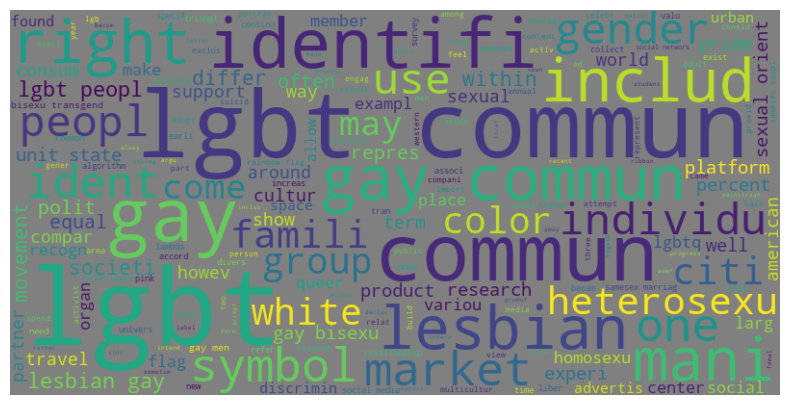

In [24]:
#Creating a word cloud of the most important words
wordcloud = WordCloud(width=800, height=400, background_color="grey").generate(processed_paragraphs)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h1>Summary and Conclusion</h1>

<h3>Summary</h3>
<p>This project used web scraping to pull the content from a provided Wikipedia page, then processed it down into a summary. It used various text processing techniques to prepare the text for Text Vectorization and Term Frequency-Inverse Document Frequency analysis. The TF-IDF vectors were used to select the most important sentences from the text, then combine them into a summary.</p>

<h3>Conclusion</h3>
<p>Unfortunately, my code was unable to construct a proper summary of the page, instead only using the stemmed words in the summary. This does cause some issues in the functionality of the project as a whole. However, the link below is for a thread on Stack Overflow, and has some interesting ideas on "undoing" stemming. I would very much like to look more into this, and possibly apply it to a future version of the project.</p>
<a href="https://stackoverflow.com/questions/9481081/the-reverse-process-of-stemming">Reversing Stemming</a>